# Particle Neural Network

In [1]:
from MakeData import MakeData
from ParticleNet import ParticleNet
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from mpl_toolkits import mplot3d
import neural_structured_learning as nsl
from collections import defaultdict
params = 5

In [2]:
p = 100
Ntrain = 100000
Ntest = 100000

In [3]:
train,train_vals = MakeData(p,Ntrain)
test,test_vals = MakeData(p,Ntest)

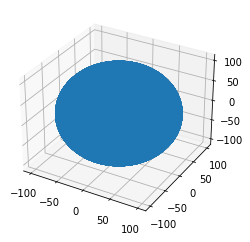

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train[:,0], train[:,1], train[:,2]);

(0.0, 400.0)

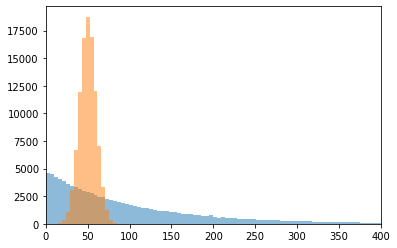

In [5]:
n,bins,weights = plt.hist(train[train_vals==0,3], bins = 'auto', alpha = 0.5)
plt.hist(train[train_vals==1,3], bins = bins, alpha = 0.5)
plt.xlim(0,400)

(0.0, 2500.0)

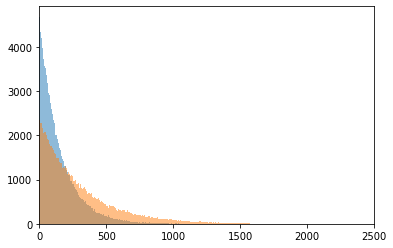

In [6]:
n,bins,weights = plt.hist(train[train_vals==0,4], bins = 'auto', alpha = 0.5)
plt.hist(train[train_vals==1,4], bins = bins, alpha = 0.5)
plt.xlim(0,2500)

In [7]:
print(test_vals[0:20])

[0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]


In [8]:
train_data = [[]]
for i in range(Ntrain*2):
    train_data.append(np.array([train[i,:],train_vals[i]]))
    train_data.append(np.array([train[i,:]],train_vals[i]))

<ipython-input-8-27b5978335fd>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_data.append(np.array([train[i,:],train_vals[i]]))


In [9]:
predictions = ParticleNet(train,train_vals,test,10)

Epoch 1/10
6250/6250 [==============================] - 4s 584us/step - loss: 0.7958 - accuracy: 0.7653
Epoch 2/10
6250/6250 [==============================] - 3s 553us/step - loss: 0.4043 - accuracy: 0.8273
Epoch 3/10
6250/6250 [==============================] - 4s 624us/step - loss: 0.3717 - accuracy: 0.8393
Epoch 4/10
6250/6250 [==============================] - 4s 574us/step - loss: 0.3547 - accuracy: 0.8470
Epoch 5/10
6250/6250 [==============================] - 4s 590us/step - loss: 0.3488 - accuracy: 0.8498
Epoch 6/10
6250/6250 [==============================] - 4s 620us/step - loss: 0.3422 - accuracy: 0.8530
Epoch 7/10
6250/6250 [==============================] - 4s 577us/step - loss: 0.3399 - accuracy: 0.8534
Epoch 8/10
6250/6250 [==============================] - 3s 532us/step - loss: 0.3375 - accuracy: 0.8549
Epoch 9/10
6250/6250 [==============================] - 3s 525us/step - loss: 0.3397 - accuracy: 0.8537
Epoch 10/10
6250/6250 [==============================] - 3s 443u

In [10]:
FalseExps = sum(predictions[np.where(test_vals == 0)])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")
print("")
FalseGauss = sum(predictions[np.where(test_vals == 1)])/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[1]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[0]) + " percent.")

The model, on average, thought a Expodential distribution to be just that at 77.79417187499999 percent.
And thought a Expodential distribution to be a Gaussian distribution at 22.210177734375 percent.

The model, on average, thought a Gaussian distribution to be just that at 79.8747265625 percent.
And thought a Gaussian distribution to be a Expodential distribution at 20.1253203125 percent.


# Base Model

In [11]:
def build_base_model():
    '''Builds the Basic Model'''
    input_shape = (1,1)
    inputs = [tf.keras.Input(shape=input_shape, dtype=tf.float32, name=name) for name in FEATURE_INPUT_NAME]
#    inputs = tf.keras.Input(shape=(5,))
    print(inputs)
    
    x = tf.keras.layers.concatenate(inputs = [*inputs], axis=-1, name = 'concat')

    
    print(x)
    
    x = tf.keras.layers.Conv1D(64, 3, padding = 'same', activation='relu', name = 'conv1')(x)
    x = tf.keras.layers.Conv1D(64, 1, padding = 'same', activation='relu', name = 'conv2')(x)
#    x = tf.keras.layers.MaxPool1D(2)(x)
    x = tf.keras.layers.Conv1D(32, 3, padding = 'same', activation='relu', name = 'conv3')(x)
    x = tf.keras.layers.Conv1D(32, 1, padding = 'same', activation='relu', name = 'conv4')(x)
#    x = tf.keras.layers.MaxPool1D(2)(x)
    x = tf.keras.layers.Flatten(name = 'flatten')(x)
    x = tf.keras.layers.Dense(64, activation='relu', name = 'relu')(x)
    pred = tf.keras.layers.Dense(2, activation='softmax', name = 'output')(x) 
    model = tf.keras.Model(inputs=[*inputs], outputs=pred)

    return model

In [12]:
FEATURE_INPUT_NAME = ['Px','Py','Pz','Mass','Tau']
base_model = build_base_model()
base_model.summary()

[<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Px')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Py')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Pz')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Mass')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Tau')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 5), dtype=tf.float32, name=None), name='concat/concat:0', description="created by layer 'concat'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Px (InputLayer)                 [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
Py (InputLayer)                 [(None, 1, 1)]       0                  

In [13]:
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])

base_model.fit((train[:,0],train[:,1],train[:,2],train[:,3],train[:,4]),train_vals, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3835 - acc: 0.8248
Epoch 2/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.3285 - acc: 0.8562
Epoch 3/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.3267 - acc: 0.8564
Epoch 4/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3245 - acc: 0.8578
Epoch 5/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3252 - acc: 0.8581
Epoch 6/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.3238 - acc: 0.8584
Epoch 7/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.3245 - acc: 0.8587
Epoch 8/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.3236 - acc: 0.8584
Epoch 9/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.3226 - acc: 0.8589
Epoch 10/10
6250/6250 [==============================] - 8s 1ms/step - loss: 0.3207 - acc: 0.8596


# Adversarial Model

In [14]:
base_adv_model = build_base_model()
adv_model = nsl.keras.AdversarialRegularization(
    base_adv_model,
    label_keys = ['labels']
)

[<KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Px')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Py')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Pz')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Mass')>, <KerasTensor: shape=(None, 1, 1) dtype=float32 (created by layer 'Tau')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 1, 5), dtype=tf.float32, name=None), name='concat/concat:0', description="created by layer 'concat'")


In [15]:
trainAdv = {
    'Px': train[:,0],
    'Py': train[:,1],
    'Pz': train[:,2],
    'Mass': train[:,3],
    'Tau': train[:,4],
    'labels': train_vals
}

testAdv = {
    'Px': test[:,0],
    'Py': test[:,1],
    'Pz': test[:,2],
    'Mass': test[:,3],
    'Tau': test[:,4],
    'labels': test_vals
}

In [16]:
adv_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['acc'])

In [17]:
# Input - make input list inside list have np.array of data and 1 of labels np array, same length, different shape,
# data first, labels second
#adv_model.fit(x=(train[:,0],train[:,1],train[:,2],train[:,3],train[:,4])s,y=train_vals, epochs=1)
#adv_model.fit(x={'inputs': (train[:,0],train[:,1],train[:,2],train[:,3],train[:,4]),'labels': train_vals}, epochs=1)
#adv_model.fit(x={'inputs': (trainPx,trainPy,trainPz,trainMass,trainTau),'labels': train_vals}, epochs=1)
#adv_model.fit(x={'inputs': trainAdv,'labels': train_vals}, epochs=1)


adv_model.fit(trainAdv, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6250/6250 [==============================] - 18s 2ms/step - loss: 0.4465 - sparse_categorical_crossentropy: 0.3721 - sparse_categorical_accuracy: 0.8294 - scaled_adversarial_loss: 0.0744: 0s - loss: 0.4479 - sparse_categorical_crossentropy: 0.3732 - sparse_categorical_accuracy: 0.8287 - scaled_adversarial_loss
Epoch 2/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.3943 - sparse_categorical_crossentropy: 0.3286 - sparse_categorical_accuracy: 0.8574 - scaled_adversarial_loss: 0.0657
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.3930 - sparse_categorical_crossentropy: 

In [18]:
adv_model.summary()

Model: "AdversarialRegularization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 2)                 14658     
Total params: 14,658
Trainable params: 14,658
Non-trainable params: 0
_________________________________________________________________


In [19]:
results = adv_model.evaluate(testAdv)
named_results = dict(zip(adv_model.metrics_names, results))
print('\naccuracy:', named_results['sparse_categorical_accuracy'])

6250/6250 [==============================] - 8s 1ms/step - loss: 0.3883 - sparse_categorical_crossentropy: 0.3236 - sparse_categorical_accuracy: 0.8592 - scaled_adversarial_loss: 0.0647

accuracy: 0.8591750264167786


In [20]:
predict = adv_model.predict(testAdv)

In [21]:
FalseExps = sum(predict[np.where(test_vals == 0)])/Ntest*100
print("The model, on average, thought a Expodential distribution to be just that at " + str(FalseExps[0]) + " percent.")
print("And thought a Expodential distribution to be a Gaussian distribution at " + str(FalseExps[1]) + " percent.")
print("")
FalseGauss = sum(predict[np.where(test_vals == 1)])/Ntest*100
print("The model, on average, thought a Gaussian distribution to be just that at " + str(FalseGauss[1]) + " percent.")
print("And thought a Gaussian distribution to be a Expodential distribution at " + str(FalseGauss[0]) + " percent.")

The model, on average, thought a Expodential distribution to be just that at 80.02884375000001 percent.
And thought a Expodential distribution to be a Gaussian distribution at 19.973298828125 percent.

The model, on average, thought a Gaussian distribution to be just that at 77.6593125 percent.
And thought a Gaussian distribution to be a Expodential distribution at 22.34047265625 percent.
